In [1]:
import madrigalWeb.madrigalWeb
import pylab
import matplotlib.cm
import numpy
import h5py
import datetime
import dateutil.parser
import calendar
import re
%matplotlib inline

In [2]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2022"

maddat = madrigalWeb.madrigalWeb.MadrigalData('http://cedar.openmadrigal.org/')

In [3]:
# instrument codes for Millstone Hill
instcodes={'MHO':30}

In [4]:
# start time
st=datetime.datetime(2013, 3, 16, 0,0)
et=datetime.datetime(2013, 3, 19, 0,0)

expList = maddat.getExperiments(instcodes['MHO'], 
                                st.year, st.month, st.day, st.hour, st.minute, st.second, 
                                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 100195498
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100195498
url: http://cedar.openmadrigal.org/madtoc/experiments5/2013/mlh/16mar13a
name: DICE Overflight
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2013
startmonth: 3
startday: 16
starthour: 21
startmin: 23
startsec: 22
endyear: 2013
endmonth: 3
endday: 16
endhour: 22
endmin: 34
endsec: 25
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1594078627
access: 2
Madrigal version: 3.2

id: 100195539
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100195539
url: http://cedar.openmadrigal.org/madtoc/experiments5/2013/mlh/15mar13
name: DICE Overflight
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2013
startmonth: 3
startday: 15
starthour: 19
startmin: 42
startsec: 44
endyear: 2013
endmonth: 3
endday: 16
endhour: 0
endmin: 40
endsec: 

In [5]:
# select Van Allen Conjunction experiment (regular ion line parameters)
for thisExp in expList:
    if re.match(exp.name, 'Van Allen'):
        break
print('Selecting: %s' % (thisExp.name))

Selecting: Van Allen Conjunction


In [6]:
# survey all experiment files available
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    print(file.kindatdesc)

Combined basic parameters file - all antennas and modes
Zenith single-pulse basic parameters
Zenith alternating-code basic parameters
MISA (steerable) single-pulse basic parameters
MISA (steerable) alternating-code basic parameters
Gridded data fitted to a uniform spatial and temporal grid - useful for modellers
Derived vector ion velocities


In [7]:
# Select the correct experiment file (MISA uncoded pulse)
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    if re.match('MISA \(steerable\) single-pulse',file.kindatdesc):
        print('Using: %s' % (file))
        thisFile=file
        break

Using: name: /opt/cedar3/experiments5/2013/mlh/16mar13/mlh130316k.005.hdf5
kindat: 3430
kindatdesc: MISA (steerable) single-pulse basic parameters
category: 1
status: Final
permission: 0
expId: 100195503
doi: https://w3id.org/cedar?experiment_list=experiments5/2013/mlh/16mar13&file_list=mlh130316k.005.hdf5



In [8]:
# Download the file (should end up in this folder)       
filename=thisFile.name
outfilename=thisFile.name.split('/')[-1]
result = maddat.downloadFile(filename,outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [9]:
# Load file and get data table
hz = h5py.File(outfilename,'r')
hztl = hz['Data']['Table Layout']

In [10]:
# Survey the radar pulse lengths in this experiment
print('Unique pulse lengths in sec: %s' % (list(set(hztl['pl']))))

Unique pulse lengths in sec: [0.002, 0.00048]


In [11]:
# List variables available
print(hztl.dtype)

[('year', '<f8'), ('month', '<f8'), ('day', '<f8'), ('hour', '<f8'), ('min', '<f8'), ('sec', '<f8'), ('recno', '<f8'), ('kindat', '<f8'), ('kinst', '<f8'), ('ut1_unix', '<f8'), ('ut2_unix', '<f8'), ('range', '<f8'), ('pl', '<f8'), ('mdtyp', '<f8'), ('az1', '<f8'), ('az2', '<f8'), ('el1', '<f8'), ('el2', '<f8'), ('systmp', '<f8'), ('pnrmd', '<f8'), ('power', '<f8'), ('pulf', '<f8'), ('dtau', '<f8'), ('ipp', '<f8'), ('tfreq', '<f8'), ('vtx', '<f8'), ('dvtx', '<f8'), ('scntyp', '<f8'), ('cycn', '<f8'), ('posn', '<f8'), ('mresl', '<f8'), ('sn', '<f8'), ('wchsq', '<f8'), ('gfit', '<f8'), ('fpi_dataqual', '<f8'), ('ti', '<f8'), ('dti', '<f8'), ('tr', '<f8'), ('dtr', '<f8'), ('popl', '<f8'), ('dpopl', '<f8'), ('ph+', '<f8'), ('dph+', '<f8'), ('fa', '<f8'), ('dfa', '<f8'), ('co', '<f8'), ('dco', '<f8'), ('pm', '<f8'), ('dpm', '<f8'), ('vo', '<f8'), ('dvo', '<f8'), ('vdopp', '<f8'), ('dvdopp', '<f8'), ('tibf', '<f8'), ('dtibf', '<f8'), ('trbf', '<f8'), ('dtrbf', '<f8'), ('fit_type', '<f8'), ('c

In [12]:
# antenna codes for Millstone Hill
antcodes={'Zenith':32,
           'MISA':31}

In [13]:
# Define time subset
t1 = calendar.timegm(dateutil.parser.parse('2013-03-17T19:41:00').timetuple())
t2 = calendar.timegm(dateutil.parser.parse('2013-03-17T19:57:00').timetuple())

In [14]:
# Select the 2000 usec uncoded pulse from the MISA at the desired times
indx = numpy.where(numpy.logical_and(hztl['pl'] >= 1900e-6,
                                    hztl['kinst'] == antcodes['MISA']))[0]
hztl = hztl[indx]
indx = numpy.where(numpy.logical_and(hztl['ut1_unix'] >= t1,
                                     hztl['ut2_unix'] <= t2))[0]
hztl = hztl[indx]

In [15]:
# Build a time array
ut = 0.5*(hztl['ut1_unix'] + hztl['ut2_unix'])
dut = numpy.array([datetime.datetime.utcfromtimestamp(uut) for uut in ut])

In [16]:
# Electron density:
# Construct X and Y meshgrid arrays for 2D plot and extract data for plotting
tcount = len(set(ut))
X = numpy.array(hztl['gdalt'])
X = X.reshape(tcount,-1)
Y = numpy.array(dut)
Y = Y.reshape(tcount,-1)

/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_36972/328036491.py:10: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  am = ax[0].pcolor(Y, X, Z, vmin=9, vmax=12, cmap='jet')
/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_36972/328036491.py:19: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  am = ax[1].pcolor(Y, X, Z, vmin=0, vmax=1000, cmap='jet')
/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_36972/328036491.py:24: RuntimeWarning: invalid value encountered in log10
  Z = numpy.log10(hztl['ne']*hztl['vo'])
/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_3

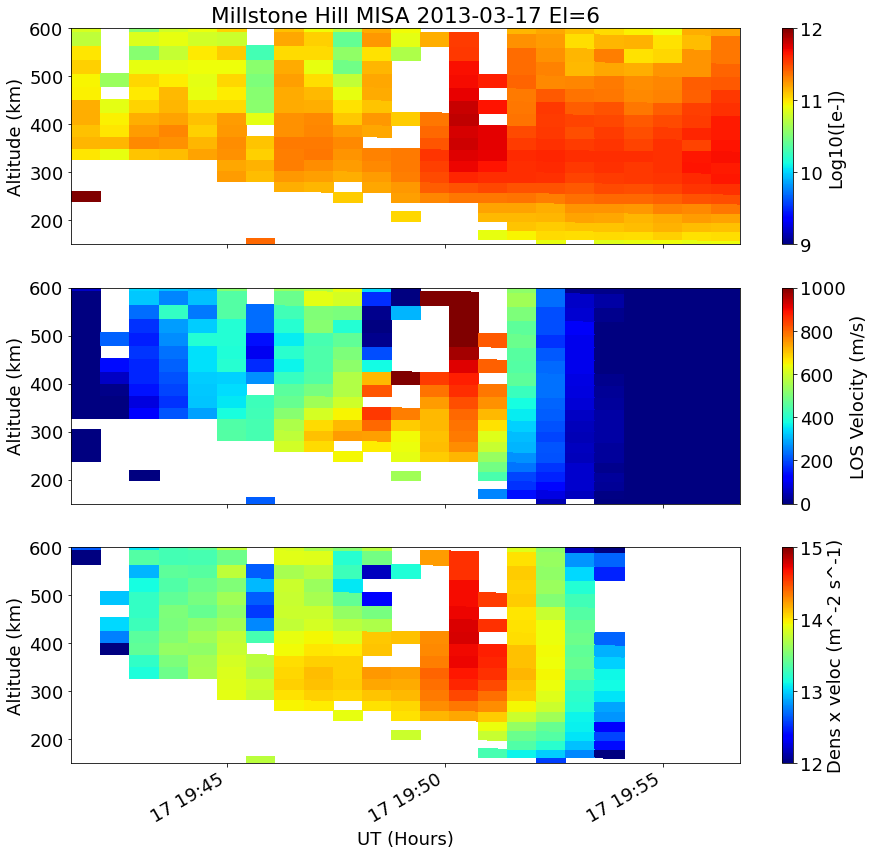

In [17]:
# Make triple panel figure:
# Electron density, LOS velocity, density x velocity

pylab.rcParams['figure.figsize']=(15,15)
pylab.rcParams['font.size']=18
f,ax = pylab.subplots(3,1,sharex=True)

Z = numpy.log10(hztl['ne'])
Z = Z.reshape(X.shape)
am = ax[0].pcolor(Y, X, Z, vmin=9, vmax=12, cmap='jet')
ax[0].set_ylim(150,600)
f.colorbar(am, ax=ax[0], label='Log10([e-])')
ax[0].set_ylabel('Altitude (km)')
ax[0].set_title('Millstone Hill MISA %s El=%.0f' % (dut[0].strftime('%Y-%m-%d'),
                                                    hztl['el1'][0]))

Z = hztl['vo']
Z = Z.reshape(X.shape)
am = ax[1].pcolor(Y, X, Z, vmin=0, vmax=1000, cmap='jet')
ax[1].set_ylim(150,600)
f.colorbar(am, ax=ax[1], label='LOS Velocity (m/s)')
ax[1].set_ylabel('Altitude (km)')

Z = numpy.log10(hztl['ne']*hztl['vo'])
Z = Z.reshape(X.shape)
am = ax[2].pcolor(Y, X, Z, vmin=12, vmax=15, cmap='jet')
ax[2].set_ylim(150,600)
f.colorbar(am, ax=ax[2], label='Dens x veloc (m^-2 s^-1)')
ax[2].set_ylabel('Altitude (km)')
ax[2].set_xlabel('UT (Hours)')

f.autofmt_xdate()

### Fixed plot of data from same time period in geographic form: 2D (latitude, longitude)

<img src="images/mho_log_e-_2013-03-17T194125ut.png" />

<img src="images/mho_vlos_2013-03-17T194125ut.png" />

# Questions

1. Why does the electron density rapidly increase to the west of Millstone at about 55 gdlat?

2. Why does the line of sight velocity rapidly increase in the same region?

3. This period was very magnetically disturbed.  What does the product of density and velocity gauge, and what does the measurement here tell you about dynamics in the subauroral region?